<p style="text-align: center;">
<font size=6 color=red> ❄️ **Auto-Encoder CNN quick Test ;)** ❄️ 
</p>

In [96]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

import glob
import cv2
import h5py

In [97]:
#Preprocessing (resizeing)
for name in glob.glob(path):
    img = cv2.imread(name)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    cv2.imwrite(name, img)
    
for name in glob.glob(path):
    img = cv2.imread(name)
    print(img.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [98]:
path_AM = r'C:\Users\Mohamed Bushnaq\Desktop\Datasets for playing\Ahmed Mostafa/*'
path_Nez = r'C:\Users\Mohamed Bushnaq\Desktop\Datasets for playing\Nezar/*'

In [99]:
def preprocess(array):
    array = array.astype("float32") / 255.0
    return array



def display(images1, images2):
    n = 11

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(256, 256))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(256, 256))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [100]:
Ahmed_data = []
Nezar_data = []

for name in glob.glob(path_AM):
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Ahmed_data.append(img)
    
for name in glob.glob(path_Nez):
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Nezar_data.append(img)

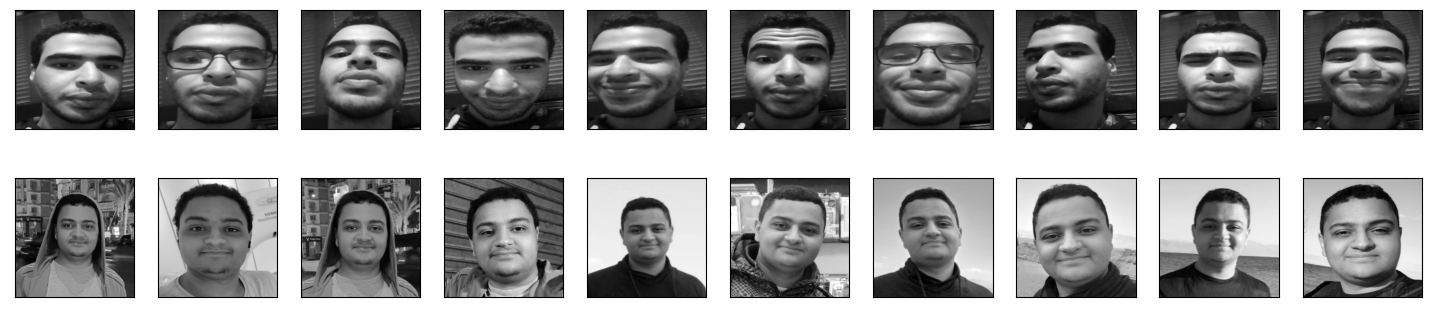

In [101]:
Ahmed_data_preprocessed = preprocess(np.array(Ahmed_data))
Nezar_data_preprocessed = preprocess(np.array(Nezar_data))

display(Ahmed_data_preprocessed, Nezar_data_preprocessed)

In [102]:
Ahmed_data_tf = tf.expand_dims(Ahmed_data_preprocessed, axis=-1)
Nezar_data_tf = tf.expand_dims(Nezar_data_preprocessed, axis=-1)

Ahmed_data_tf.shape

TensorShape([10, 256, 256, 1])

In [118]:
Mix_data_tf = tf.concat([Ahmed_data_tf, Nezar_data_tf], 0)

Mix_data_tf.shape

TensorShape([20, 256, 256, 1])

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(Mix_data_tf.numpy(), Mix_data_tf.numpy(), test_size=0.05)

In [122]:
input = layers.Input(shape=(256, 256, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_54 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 64, 64, 64)        184

In [124]:
autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=100,
    batch_size=1,
    shuffle=True, 
    validation_split = 0.053,
)

Epoch 1/100
17/17 [==============================] - 2s 62ms/step - loss: 0.6910 - val_loss: 0.6928
Epoch 2/100
17/17 [==============================] - 0s 23ms/step - loss: 0.6811 - val_loss: 0.6844
Epoch 3/100
17/17 [==============================] - 0s 22ms/step - loss: 0.6362 - val_loss: 0.6330
Epoch 4/100
17/17 [==============================] - 0s 22ms/step - loss: 0.6033 - val_loss: 0.5538
Epoch 5/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5713 - val_loss: 0.5289
Epoch 6/100
17/17 [==============================] - 0s 22ms/step - loss: 0.5671 - val_loss: 0.5252
Epoch 7/100
17/17 [==============================] - 0s 22ms/step - loss: 0.5662 - val_loss: 0.5271
Epoch 8/100
17/17 [==============================] - 0s 22ms/step - loss: 0.5639 - val_loss: 0.5230
Epoch 9/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5638 - val_loss: 0.5239
Epoch 10/100
17/17 [==============================] - 0s 22ms/step - loss: 0.5633 - val_loss: 0.5226

17/17 [==============================] - 0s 27ms/step - loss: 0.5599 - val_loss: 0.5282
Epoch 83/100
17/17 [==============================] - 0s 22ms/step - loss: 0.5610 - val_loss: 0.5180
Epoch 84/100
17/17 [==============================] - 0s 27ms/step - loss: 0.5578 - val_loss: 0.5180
Epoch 85/100
17/17 [==============================] - 0s 25ms/step - loss: 0.5567 - val_loss: 0.5173
Epoch 86/100
17/17 [==============================] - 0s 22ms/step - loss: 0.5568 - val_loss: 0.5176
Epoch 87/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5568 - val_loss: 0.5169
Epoch 88/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5568 - val_loss: 0.5168
Epoch 89/100
17/17 [==============================] - 0s 24ms/step - loss: 0.5563 - val_loss: 0.5175
Epoch 90/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5563 - val_loss: 0.5168
Epoch 91/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5562 - val_loss: 0.5167
Epo

1/1 [==============================] - 0s 43ms/step


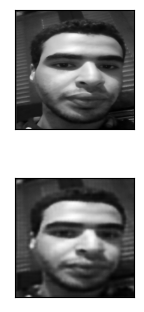

In [126]:
predictions = autoencoder.predict(X_test)
display(X_test, predictions)

1/1 [==============================] - 0s 58ms/step


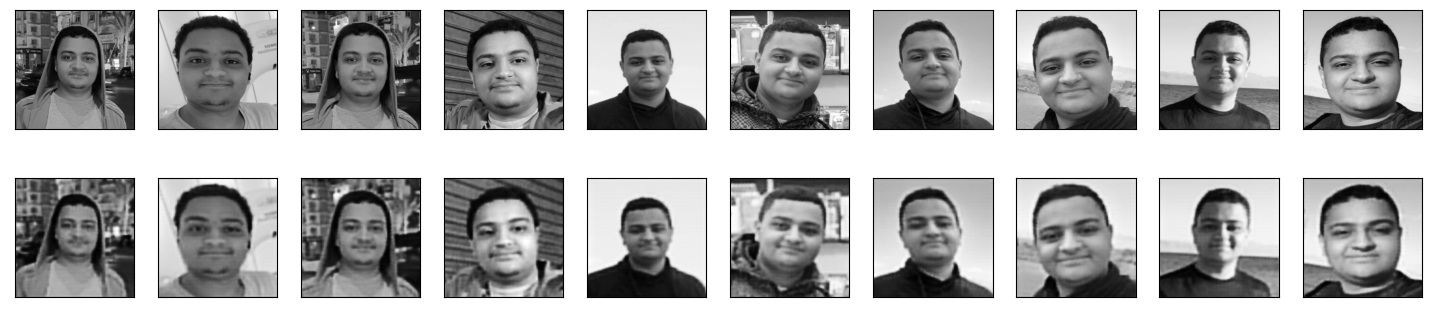

In [129]:
predictions = autoencoder.predict(Nezar_data_tf)
display(Nezar_data_tf.numpy(), predictions)

1/1 [==============================] - 0s 69ms/step


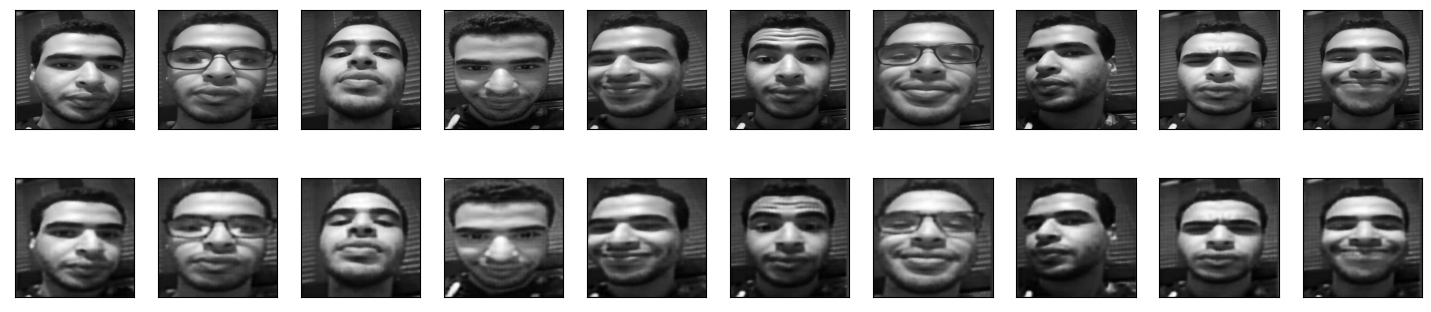

In [130]:
predictions = autoencoder.predict(Ahmed_data_tf)
display(Ahmed_data_tf.numpy(), predictions)

In [131]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [132]:
train_data = train_data[0:10]

In [133]:
train_data[0].shape

(28, 28)

In [134]:
mnist_train_data = []

In [135]:
for i in range(train_data.shape[0]):
    mnist_train_data.append(cv2.resize(train_data[i], (256, 256), interpolation = cv2.INTER_AREA))

In [136]:
mnist_train_data_tf = tf.expand_dims(mnist_train_data, axis=-1)

mnist_train_data_tf.shape

TensorShape([10, 256, 256, 1])

1/1 [==============================] - 0s 49ms/step


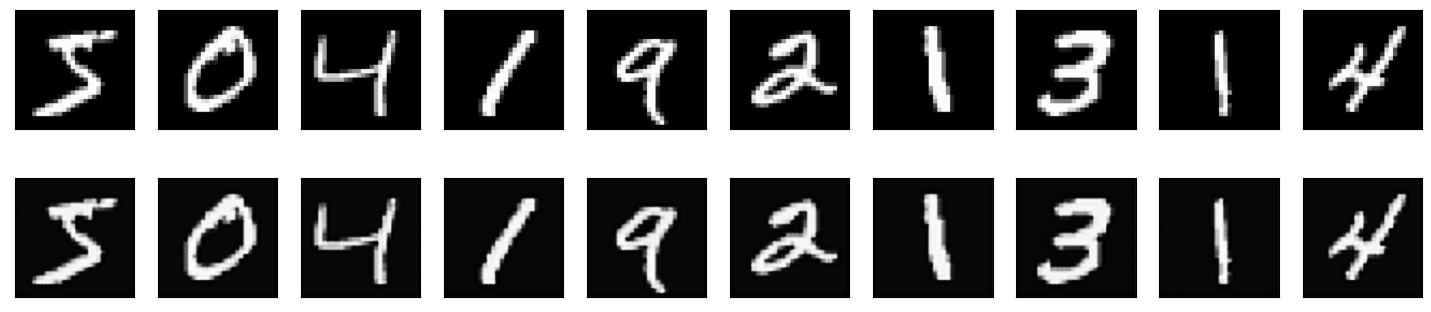

In [137]:
predictions = autoencoder.predict(mnist_train_data_tf)
display(mnist_train_data_tf.numpy(), predictions)